# Run basic singlepoint calculation

In [7]:
# Load profile
from aiida import load_profile
load_profile()

Profile<uuid='468a9d4d0812492ba52462f2aca53e23' name='presto'>

In [8]:
from aiida.orm import StructureData
from ase.build import bulk
from ase.io import read

#structure = StructureData(ase=read("Structures/qmof-ffeef76.cif"))
structure = StructureData(ase=bulk("NaCl", "rocksalt", 5.63))

In [9]:
from aiida_mlip.data.model import ModelData
uri = "https://github.com/stfc/janus-core/raw/main/tests/models/mace_mp_small.model"
model = ModelData.from_uri(uri, architecture="mace_mp", cache_dir="mlips")

In [10]:
from aiida.orm import load_code
code = load_code("janus@localhost")

In [11]:
from aiida.orm import Str
inputs = {
        "code": code,
        "model": model,
        "struct": structure,
        "arch": Str(model.architecture),
        "precision": Str("float64"),
        "device": Str("cpu"),
        "metadata": {"options": {"resources": {"num_machines": 1}}},
    }

In [12]:
from aiida.plugins import CalculationFactory
singlepointCalc = CalculationFactory("mlip.sp")

In [14]:
from pathlib import Path

from aiida_mlip.workflows.ht_workgraph import get_ht_workgraph

wg = get_ht_workgraph(
    calc=singlepointCalc,
    folder=Path("/home/mtr46585/aiida-mlip/tests/workflows/structures/"),
    calc_inputs=inputs,
    final_struct_key="xyz_output",
)

In [15]:
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'ht_calc…

In [16]:
wg.run()

06/23/2025 11:05:47 AM <62696> aiida.broker.rabbitmq: [WARNING] RabbitMQ v3.12.1 is not supported and will cause unexpected problems!
06/23/2025 11:05:47 AM <62696> aiida.broker.rabbitmq: [WARNING] It can cause long-running workflows to crash and jobs to be submitted multiple times.
06/23/2025 11:05:48 AM <62696> aiida.broker.rabbitmq: [WARNING] See https://github.com/aiidateam/aiida-core/wiki/RabbitMQ-version-to-use for details.
06/23/2025 11:05:48 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [36|WorkGraphEngine|continue_workgraph]: Continue workgraph.
06/23/2025 11:05:48 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [36|WorkGraphEngine|continue_workgraph]: tasks ready to run: ht_calc
06/23/2025 11:05:48 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [36|WorkGraphEngine|run_tasks]: Run task: ht_calc, type: graph_builder


------------------------------------------------------------
kwargs:  {'calc': <class 'aiida_mlip.calculations.singlepoint.Singlepoint'>, 'calc_inputs': {'arch': <Str: uuid: 50db498a-6fc5-436f-962c-0c7130f2ee51 (pk: 33) value: mace_mp>, 'code': <InstalledCode: Remote code 'janus' on localhost pk: 1, uuid: 04b533e8-ef64-4395-a768-d8417149953b>, 'device': <Str: uuid: b2de2ee8-0635-44da-911d-c48fa5019131 (pk: 35) value: cpu>, 'metadata': {'options': {'resources': {'num_machines': 1}}}, 'model': <ModelData: uuid: 6e73fe30-b388-4935-9719-46c064951134 (pk: 2)>, 'precision': <Str: uuid: 2b8fbfd7-9473-4bd5-88ed-f1f56a76ee5c (pk: 34) value: float64>, 'struct': <StructureData: uuid: 7e47dae5-2e18-411a-b4b0-17bfb1a454c0 (pk: 32)>}, 'final_struct_key': 'xyz_output', 'folder': PosixPath('/home/mtr46585/aiida-mlip/tests/workflows/structures'), 'input_struct_key': 'struct', 'recursive': True}
defining outputnode


06/23/2025 11:05:51 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [36|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 39
06/23/2025 11:05:52 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|continue_workgraph]: Continue workgraph.
06/23/2025 11:05:52 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|continue_workgraph]: tasks ready to run: calc_H2O,calc_methane
06/23/2025 11:05:52 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|run_tasks]: Run task: calc_H2O, type: CALCJOB


------------------------------------------------------------
kwargs:  {'arch': <Str: uuid: 50db498a-6fc5-436f-962c-0c7130f2ee51 (pk: 33) value: mace_mp>, 'code': <InstalledCode: Remote code 'janus' on localhost pk: 1, uuid: 04b533e8-ef64-4395-a768-d8417149953b>, 'device': <Str: uuid: b2de2ee8-0635-44da-911d-c48fa5019131 (pk: 35) value: cpu>, 'metadata': {'options': {'resources': {'num_machines': 1}}}, 'model': <ModelData: uuid: 6e73fe30-b388-4935-9719-46c064951134 (pk: 2)>, 'precision': <Str: uuid: 2b8fbfd7-9473-4bd5-88ed-f1f56a76ee5c (pk: 34) value: float64>, 'struct': <StructureData: uuid: 63120be9-dc4d-404c-a403-24e1782bbca8 (pk: 37)>}


06/23/2025 11:05:53 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|run_tasks]: Run task: calc_methane, type: CALCJOB


------------------------------------------------------------
kwargs:  {'arch': <Str: uuid: 50db498a-6fc5-436f-962c-0c7130f2ee51 (pk: 33) value: mace_mp>, 'code': <InstalledCode: Remote code 'janus' on localhost pk: 1, uuid: 04b533e8-ef64-4395-a768-d8417149953b>, 'device': <Str: uuid: b2de2ee8-0635-44da-911d-c48fa5019131 (pk: 35) value: cpu>, 'metadata': {'options': {'resources': {'num_machines': 1}}}, 'model': <ModelData: uuid: 6e73fe30-b388-4935-9719-46c064951134 (pk: 2)>, 'precision': <Str: uuid: 2b8fbfd7-9473-4bd5-88ed-f1f56a76ee5c (pk: 34) value: float64>, 'struct': <StructureData: uuid: c86668c2-42c7-4ab7-995c-b73e1157ba34 (pk: 38)>}


06/23/2025 11:05:54 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 42, 45
06/23/2025 11:06:13 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|update_task_state]: Task: calc_H2O finished.
06/23/2025 11:06:13 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|update_task_state]: Task: calc_methane finished.
06/23/2025 11:06:14 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|continue_workgraph]: Continue workgraph.
06/23/2025 11:06:14 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
06/23/2025 11:06:14 AM <62696> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [39|WorkGraphEngine|finalize]: Finalize workgraph.
06/23/2025 11:06:14 AM

{'final_structures': AttributeDict({'H2O': <SinglefileData: uuid: 6314c748-fad3-4b6f-a048-1d05f1335688 (pk: 52)>, 'methane': <SinglefileData: uuid: 2a8c75f3-1263-4175-b14c-051470e17d54 (pk: 56)>}),
 'execution_count': <Int: uuid: aa5c9b93-db8b-4998-b43d-b42ae27e8d3f (pk: 59) value: 1>}

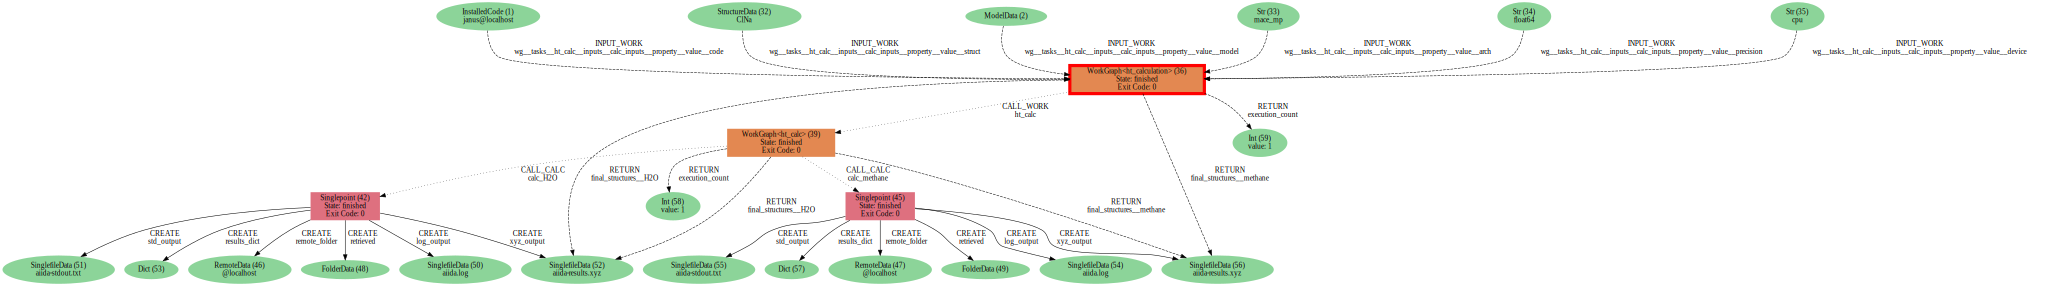

In [17]:
from aiida_workgraph.utils import generate_node_graph

generate_node_graph(wg.pk)